
Clustered Data:
   effective_literacy_rate_total  Cluster
0                          79.86        0
1                          91.99        1
2                          80.51        0
3                          83.46        0
4                          68.38        2


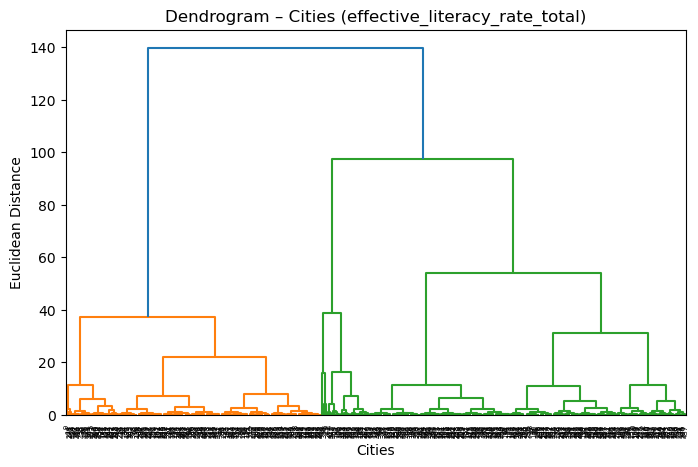

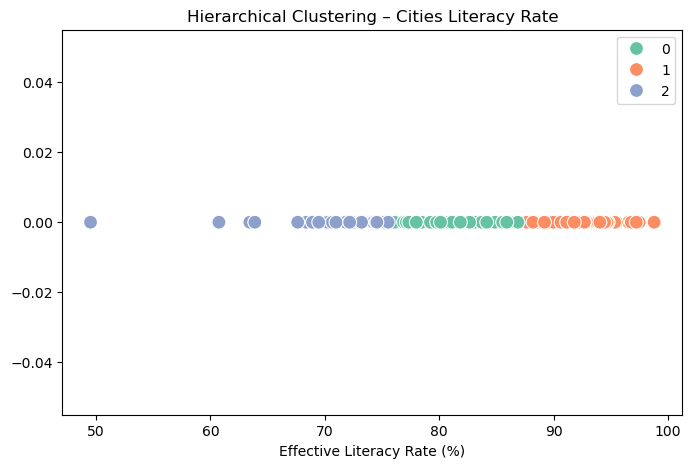

In [3]:
# Hierarchical Clustering – Cities_r2.csv
# Feature: effective_literacy_rate_total

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Load dataset
df = pd.read_csv("cities_r2.csv")

# Encode categorical columns
le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])

# Select feature for clustering
X = df[["effective_literacy_rate_total"]]

# -----------------------------
# Apply Hierarchical Clustering
# -----------------------------
hc = AgglomerativeClustering(n_clusters=3, linkage='ward')
df["Cluster"] = hc.fit_predict(X)

print("\nClustered Data:")
print(df[["effective_literacy_rate_total", "Cluster"]].head())

# -----------------------------
# Dendrogram Visualization
# -----------------------------
plt.figure(figsize=(8, 5))
Z = linkage(X, method='ward')
dendrogram(Z)
plt.title("Dendrogram – Cities (effective_literacy_rate_total)")
plt.xlabel("Cities")
plt.ylabel("Euclidean Distance")
plt.show()

# -----------------------------
# Scatter Plot Visualization
# -----------------------------
plt.figure(figsize=(8, 5))
sns.scatterplot(x="effective_literacy_rate_total", y=[0]*len(df),
                hue="Cluster", data=df, palette="Set2", s=100)
plt.title("Hierarchical Clustering – Cities Literacy Rate")
plt.xlabel("Effective Literacy Rate (%)")
plt.legend()
plt.show()
